In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
dfCanciones = pd.read_excel(r"C:\Users\danie\Documents\songdata_ETL.xlsx")
dfCanciones.head(2)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370


In [8]:
dfCanciones.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


<function matplotlib.pyplot.show(close=None, block=None)>

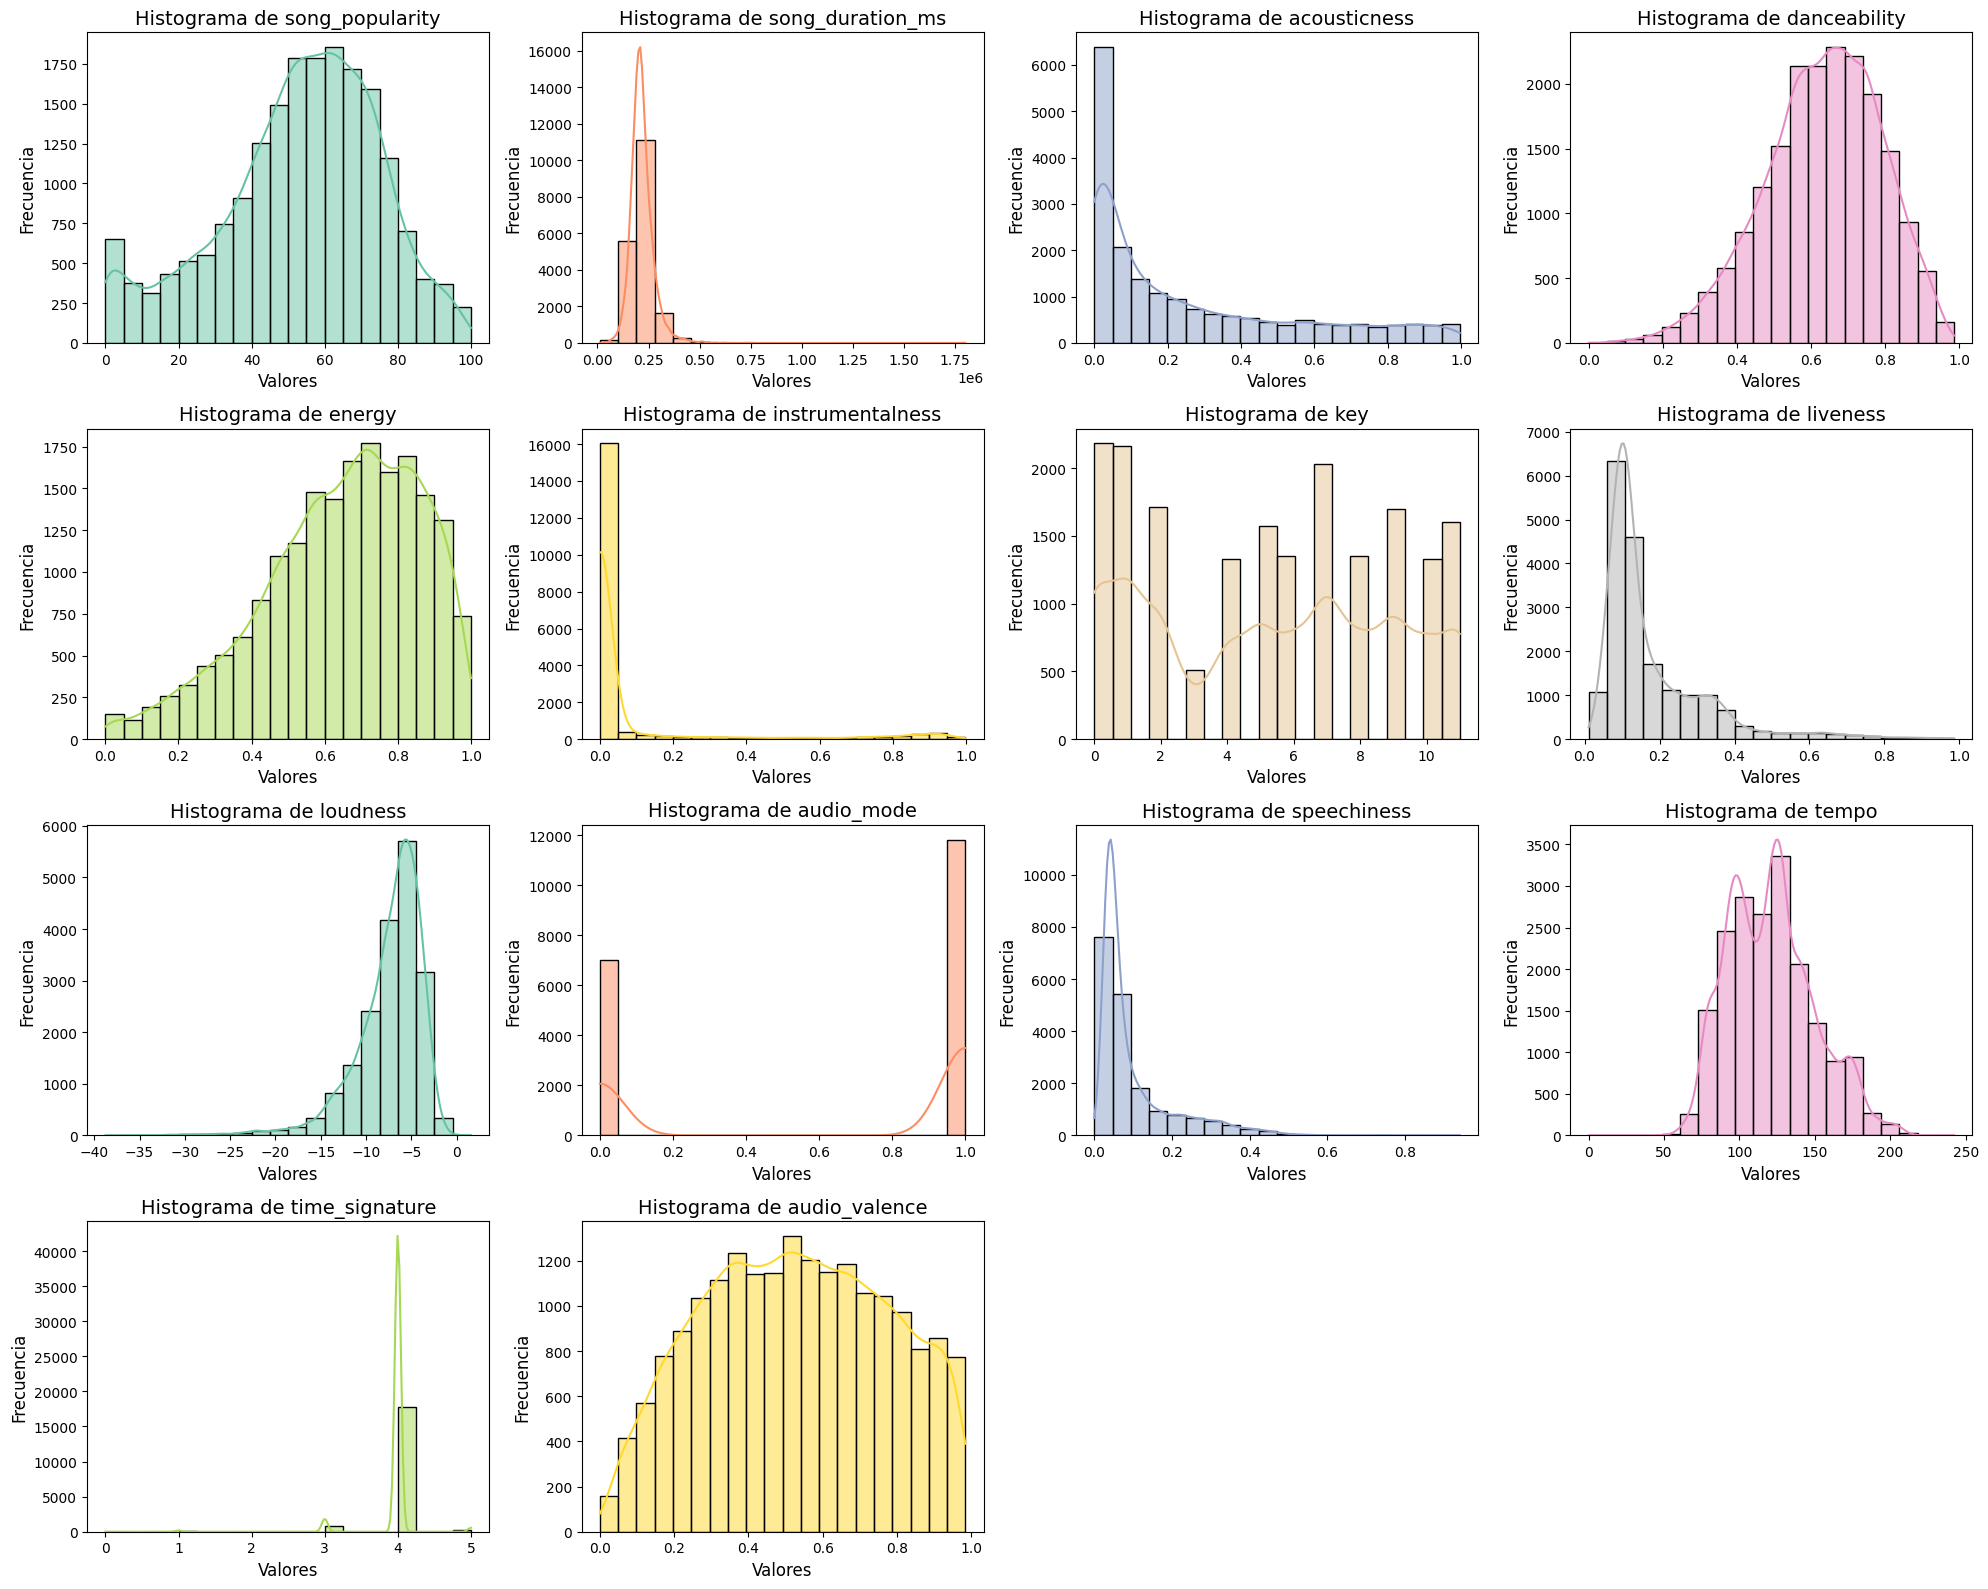

In [9]:
dfNumerico = dfCanciones.select_dtypes(include='number')
dfNumerico.head(5)

num_vars = len(dfNumerico.columns)
cols = 4
rows = (num_vars // cols)+(num_vars % cols > 0)
plt.figure(figsize=(20, rows * 4))
paleta = sns.color_palette('Set2', num_vars)
for i, columna in enumerate (dfNumerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(dfNumerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)
    plt.title(f'Histograma de {columna}', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

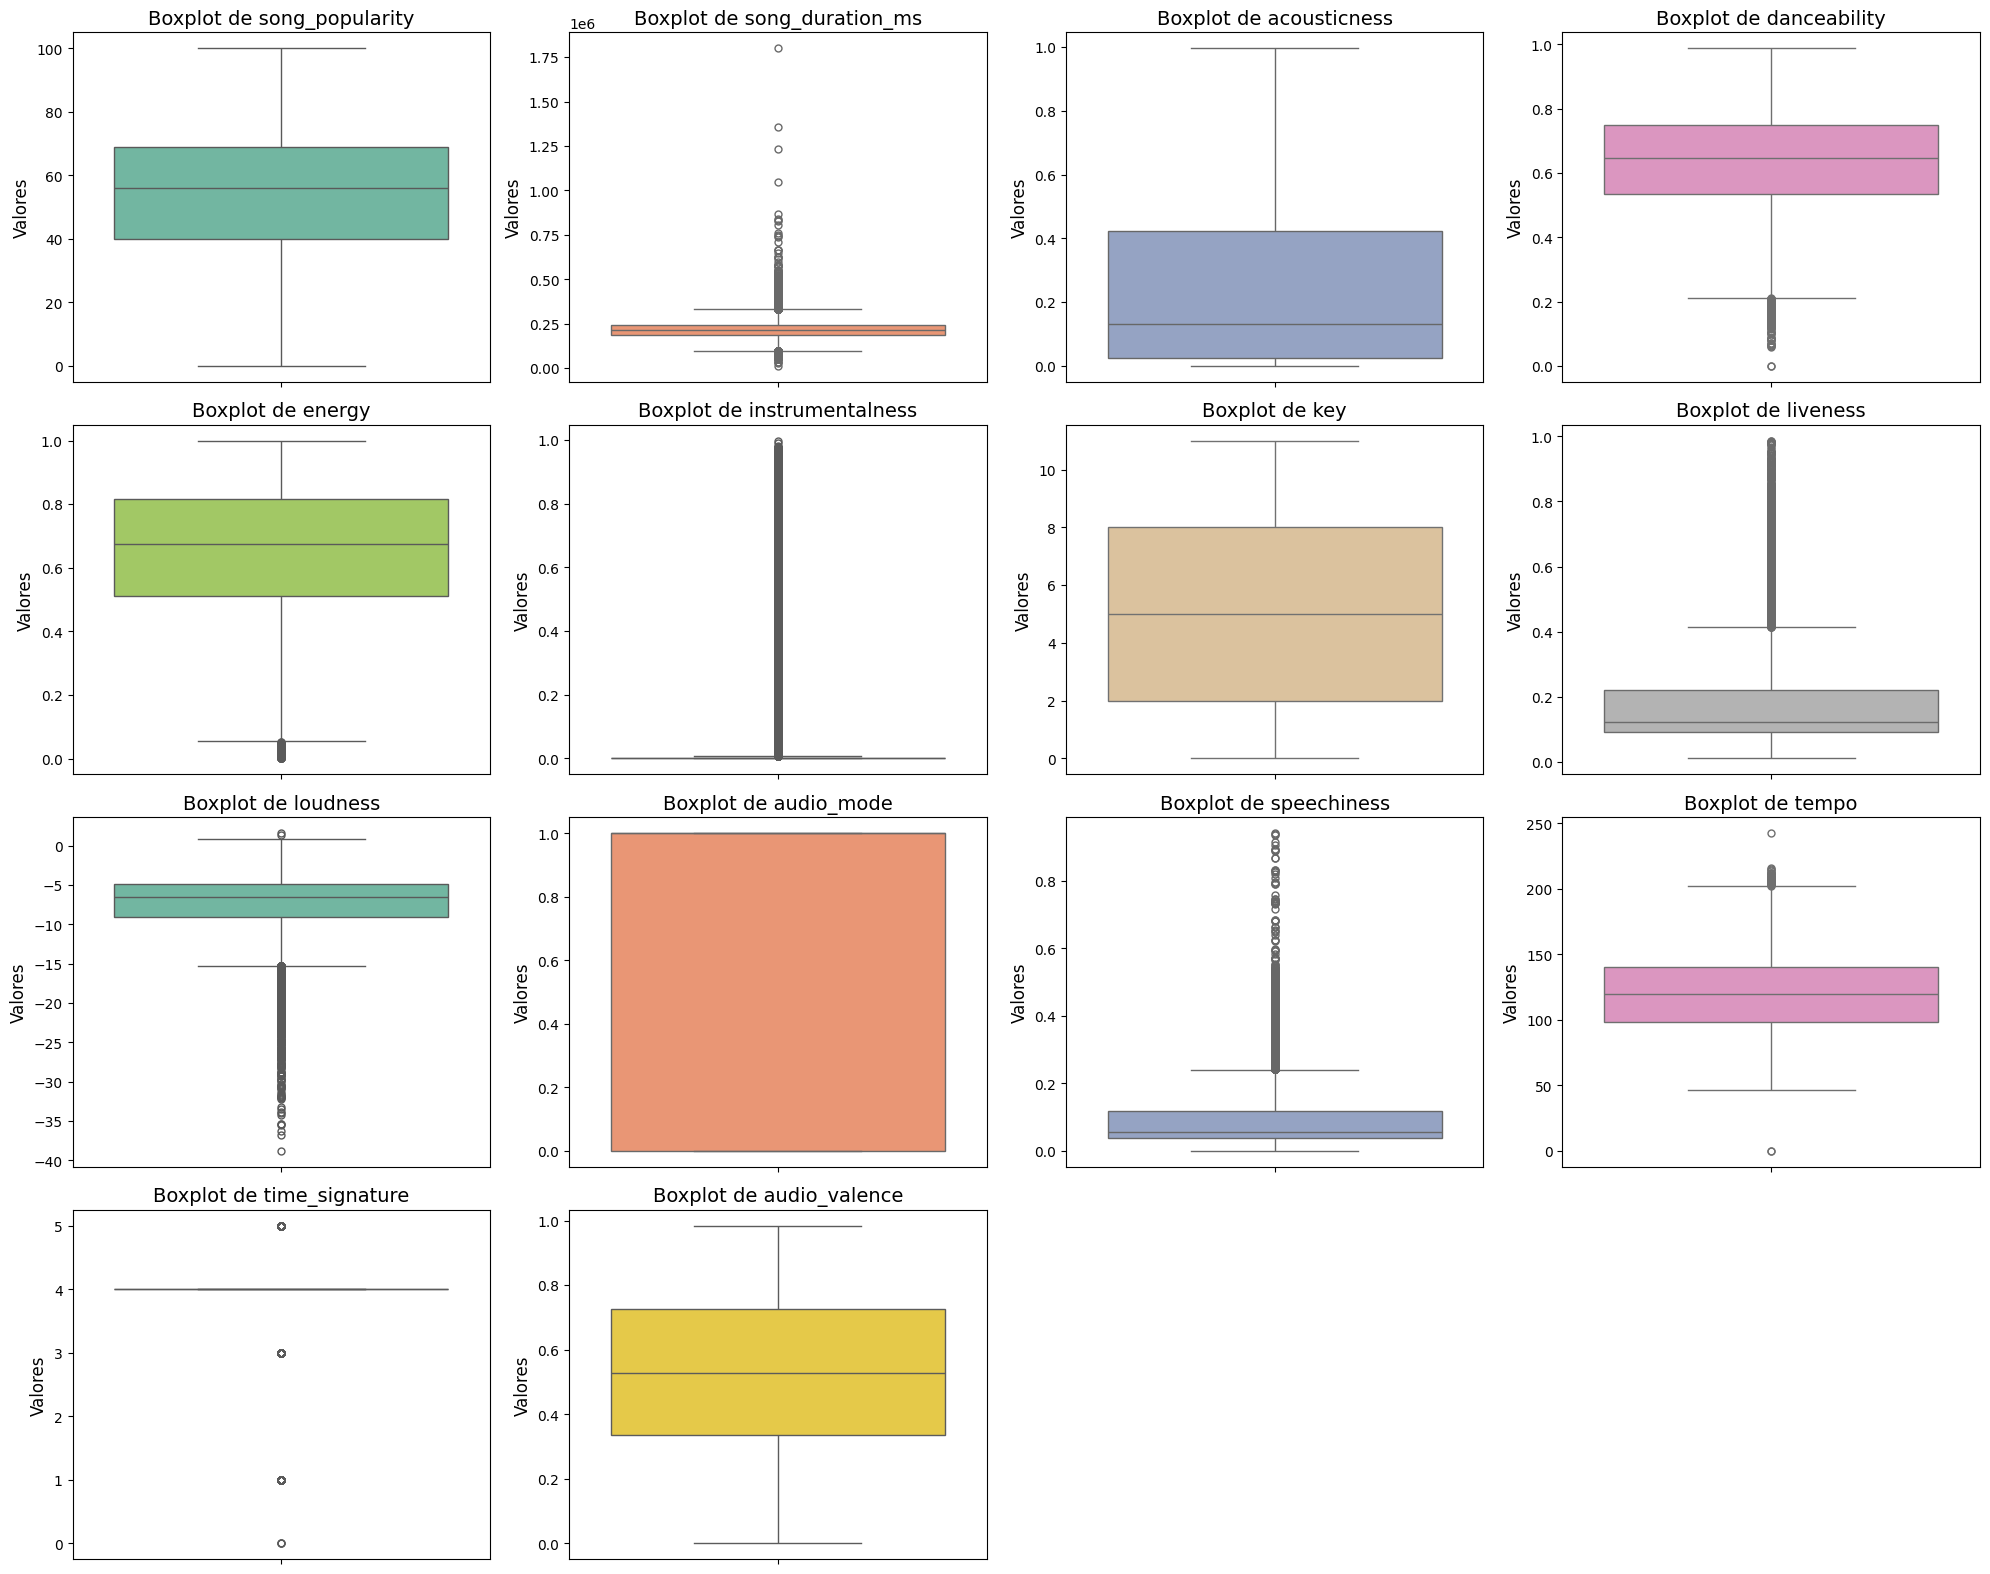

In [10]:
num_vars = len(dfNumerico.columns)
cols = 4
rows = (num_vars // cols)+(num_vars % cols > 0)
plt.figure(figsize=(20, rows * 4))
paleta = sns.color_palette('Set2', num_vars)
for i, columna in enumerate (dfNumerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y = dfNumerico[columna], color = paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('Valores', fontsize=12)
plt.tight_layout()
plt.show

In [11]:
print(dfCanciones.columns)

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


In [13]:
numeric_columns = [
    'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 
    'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
    'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence'
]

for col in numeric_columns:
    dfCanciones = IQR(dfCanciones, col)

print("Valores atipicos filtrados")

Valores atipicos filtrados


In [14]:
dfCanciones.to_excel('songdata_ML.xlsx')